[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

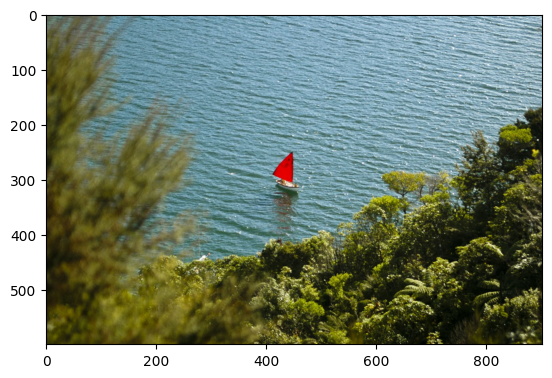

In [4]:
#Loading Images
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image
%matplotlib inline
def download_and_unzip(url, save_path):
  print(f"Downloading and extracting assests....", end="")
# Downloading zip file using urllib package.
  urlretrieve(url, save_path)
  try:
# Extracting zip file using the zipfile package.
    with ZipFile(save_path) as z:
# Extract ZIP file contents in the same directory.
      z.extractall(os.path.split(save_path)[0])
    print("Done")
  except Exception as e:
    print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")
# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
  download_and_unzip(URL, asset_zip_path)
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]
plt.imshow(img_NZ_rgb)


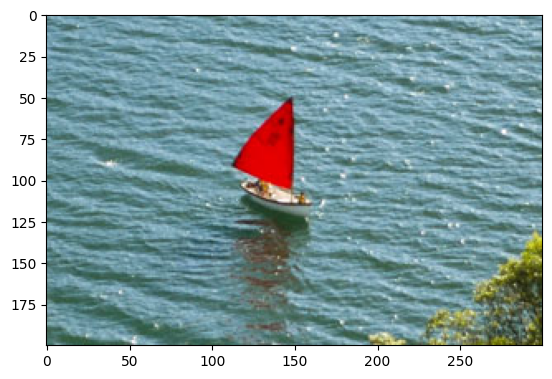

In [5]:
#Cropping Images
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

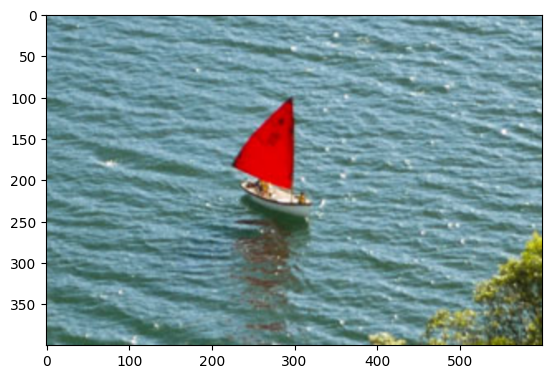

In [6]:
#Resizing the Image
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

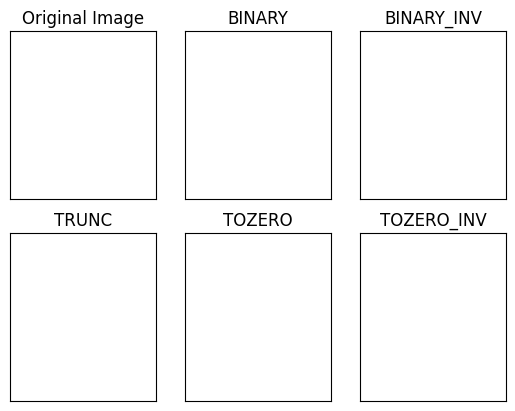

In [45]:
#Threshold of the Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1)  # Specify colormap explicitly
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

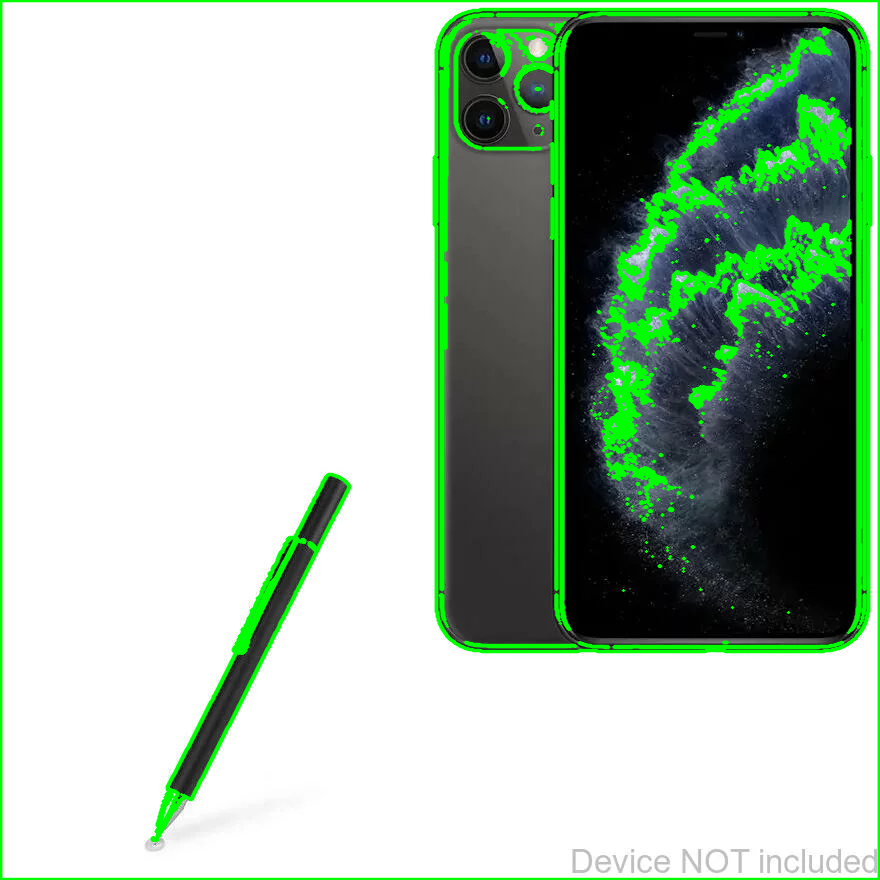

True

In [31]:
#Contour Analysis
from google.colab.patches import cv2_imshow
import cv2
from google.colab.patches import cv2_imshow

# Read the input image
image = cv2.imread('/content/input_image')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# Display the result
cv2_imshow(image_copy)

# Save the result
cv2.imwrite('/content/contours_none_image1.jpg', image_copy)


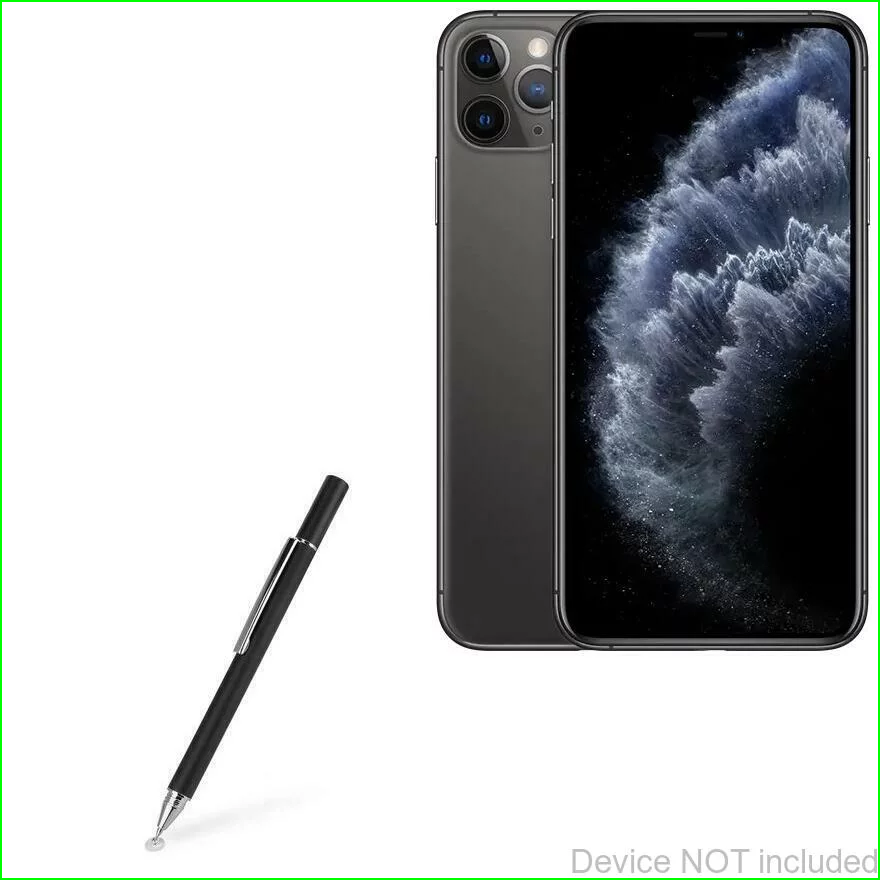

In [44]:
from google.colab.patches import cv2_imshow
import cv2

# Read the input image
image = cv2.imread('/content/input_image')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
blob_image = image.copy()
cv2.drawContours(blob_image, contours, -1, (0, 255, 0), 2)

# Display the result
cv2_imshow(blob_image)
